**<p style="font-size:30px;">.ipynb file for CIND 820 Capstone Project</p>**

**Reading  and getting an overview of the dataset**

In [214]:
# importing pandas library
import pandas as pd
import scipy.stats as stats

In [215]:
# reading the electric vehicle population data '.csv' file and storing it in 'electric_v' dataframe
electric_v = pd.read_csv("D:/Personal/Data Analytics Learning/TMU/CIND 820 Capstone/Electric_Vehicle_Population_Data.csv")

In [216]:
# printing the dimensions of 'electric_v'
print(electric_v.shape)

(186879, 17)


In [217]:
# getting an overview of 'electric_v' by printing the first 5 observations
print(electric_v.head())

   VIN (1-10)  County       City State  Postal Code  Model Year   Make  \
0  WBY8P6C58K    King    Seattle    WA      98115.0        2019    BMW   
1  5YJSA1DN4D  Kitsap  Bremerton    WA      98312.0        2013  TESLA   
2  5YJSA1E26J    King       Kent    WA      98042.0        2018  TESLA   
3  WBY2Z2C54E    King   Bellevue    WA      98004.0        2014    BMW   
4  5YJXCDE23J    King   Bellevue    WA      98004.0        2018  TESLA   

     Model                   Electric Vehicle Type  \
0       I3          Battery Electric Vehicle (BEV)   
1  MODEL S          Battery Electric Vehicle (BEV)   
2  MODEL S          Battery Electric Vehicle (BEV)   
3       I8  Plug-in Hybrid Electric Vehicle (PHEV)   
4  MODEL X          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             153   
1           Clean Alternative Fuel Vehicle Eligible             208   
2           Clean

In [218]:
# printing a concise summary of 'electric_v' dataframe
print(electric_v.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186879 entries, 0 to 186878
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         186879 non-null  object 
 1   County                                             186876 non-null  object 
 2   City                                               186876 non-null  object 
 3   State                                              186879 non-null  object 
 4   Postal Code                                        186876 non-null  float64
 5   Model Year                                         186879 non-null  int64  
 6   Make                                               186879 non-null  object 
 7   Model                                              186879 non-null  object 
 8   Electric Vehicle Type                              186879 non-null  object

**Cleaning the Data**

In [219]:
# checking if there are any duplicate entries in the dataframe
print(electric_v['DOL Vehicle ID'].duplicated().sum())

0


In [220]:
# checking for null values in the dataframe
print(electric_v.isnull().sum())

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 403
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


In [221]:
# dropping the observations having null values under 'Legislative District' as those observations belongs to states other than Washington
electric_v = electric_v.dropna(subset=['Legislative District'])

# dropping observations having null values under 'Vehicle Location'
electric_v = electric_v.dropna(subset=['Vehicle Location'])

# checking for null values again
print(electric_v.isnull().sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [222]:
# checking the data types of variables in 'electric_v' dataframe
print(electric_v.dtypes)

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [223]:
# importing 're' library for matching regular expressions
import re

# defining a function to match a regular expression and returning a tuple with two values
def get_coordinates(location):
    if location and isinstance(location, str):
        extractor = re.match(r'POINT \(([^ ]+) ([^ ]+)\)', location)
        if extractor:
            lat = float(extractor.group(2))
            long = float (extractor.group(1))
            return lat, long
    return None, None

# applying the function to the 'Vehicle Location' variable in 'electric_v' data frame 
# storing the values in two new variables named 'Latitude' and 'Longitude'
electric_v['Latitude'], electric_v['Longitude'] = zip(*electric_v['Vehicle Location'].apply(get_coordinates))

# Insert the new columns just after 'Vehicle Location' for contextual relevance
location_index = electric_v.columns.get_loc('Vehicle Location')
electric_v.insert(location_index + 1, 'Latitude', electric_v.pop('Latitude'))
electric_v.insert(location_index + 2, 'Longitude', electric_v.pop('Longitude'))

In [224]:
# creating a list of columns that need to be converted to 'categorical' data type
categorical_columns = [
    'County', 'City', 'State', 'Make', 'Model', 
    'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    'Electric Utility', 'Legislative District', '2020 Census Tract'
]

# converting the respective variables to categorical datatype
for col in categorical_columns:
    electric_v[col] = electric_v[col].astype('category')

In [225]:
# deleting the 'Base MSRP' column in 'electric_v' as 98% of the values are 0
electric_v = electric_v.drop(columns=['Base MSRP'])

#printing the info after modification
print(electric_v.info())

<class 'pandas.core.frame.DataFrame'>
Index: 186471 entries, 0 to 186878
Data columns (total 18 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   VIN (1-10)                                         186471 non-null  object  
 1   County                                             186471 non-null  category
 2   City                                               186471 non-null  category
 3   State                                              186471 non-null  category
 4   Postal Code                                        186471 non-null  float64 
 5   Model Year                                         186471 non-null  int64   
 6   Make                                               186471 non-null  category
 7   Model                                              186471 non-null  category
 8   Electric Vehicle Type                              186471 non-null  c

**Exploratory Data Analysis of Electric Vehicle Population Data**

In [226]:
# installing ydata-profiling library which is used for comprehensive EDA reports
!pip install ydata-profiling

# importing 'ProfileReport' from 'ydata_profiling' which is used to create the EDA report
from ydata_profiling import ProfileReport

# creating profile report for electric_v data
ev_profile = ProfileReport(electric_v, title = "Electric Vehicle Population Data - Exploratory Analysis", explorative=True)

# saving the generated report to an HTML format
ev_profile.to_file('D:/Personal/Data Analytics Learning/TMU/CIND 820 Capstone/ev_profile.html')

  Obtaining dependency information for ydata-profiling from https://files.pythonhosted.org/packages/33/85/45027914eb485482976883dcaab434eab99f1ed5cb222781e7ba46bdf3b7/ydata_profiling-4.8.3-py2.py3-none-any.whl.metadata
  Using cached ydata_profiling-4.8.3-py2.py3-none-any.whl.metadata (20 kB)
  Obtaining dependency information for matplotlib<3.9,>=3.2 from https://files.pythonhosted.org/packages/7d/ca/e7bd1876a341ed8c456095962a582696cac1691cb6e55bd5ead15a755c5d/matplotlib-3.8.4-cp312-cp312-win_amd64.whl.metadata
  Using cached matplotlib-3.8.4-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
  Obtaining dependency information for pydantic>=2 from https://files.pythonhosted.org/packages/e6/f5/80931903275942770f1112b524f1948f6d6ebd44725425025ca838800de2/pydantic-2.7.3-py3-none-any.whl.metadata
  Using cached pydantic-2.7.3-py3-none-any.whl.metadata (108 kB)
  Obtaining dependency information for visions[type_image_path]<0.7.7,>=0.7.5 from https://files.pythonhosted.org/packages/7c/bf/612b24e7

ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'C:\\Python312\\Scripts\\numba'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip
Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\model\typeset.py:208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_valid_dtype = pdt.is_categorical_dtype(series) and not pdt.is_bool_dtype(
c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\model\typeset.py:208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_valid_dtype = pdt.is_categorical_dtype(series

Univariate Analysis of 'electric_v' dataframe

In [227]:
# printing a summary of the 'electric_v' dataframe
print(electric_v.describe())

         Postal Code     Model Year  Electric Range  DOL Vehicle ID  \
count  186471.000000  186471.000000   186471.000000    1.864710e+05   
mean    98261.647527    2020.661148       56.683731    2.225855e+08   
std       304.624225       2.991387       90.771207    7.463921e+07   
min     98001.000000    1997.000000        0.000000    4.385000e+03   
25%     98052.000000    2019.000000        0.000000    1.851589e+08   
50%     98122.000000    2022.000000        0.000000    2.302291e+08   
75%     98371.000000    2023.000000       73.000000    2.578035e+08   
max     99403.000000    2024.000000      337.000000    4.792548e+08   

            Latitude      Longitude  
count  186471.000000  186471.000000  
mean       47.462836    -122.079426  
std         0.610882       1.020595  
min        45.595997    -124.614078  
25%        47.358111    -122.395519  
50%        47.610347    -122.275332  
75%        47.721052    -122.136803  
max        48.992052    -117.059519  


In [228]:
# importing the necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

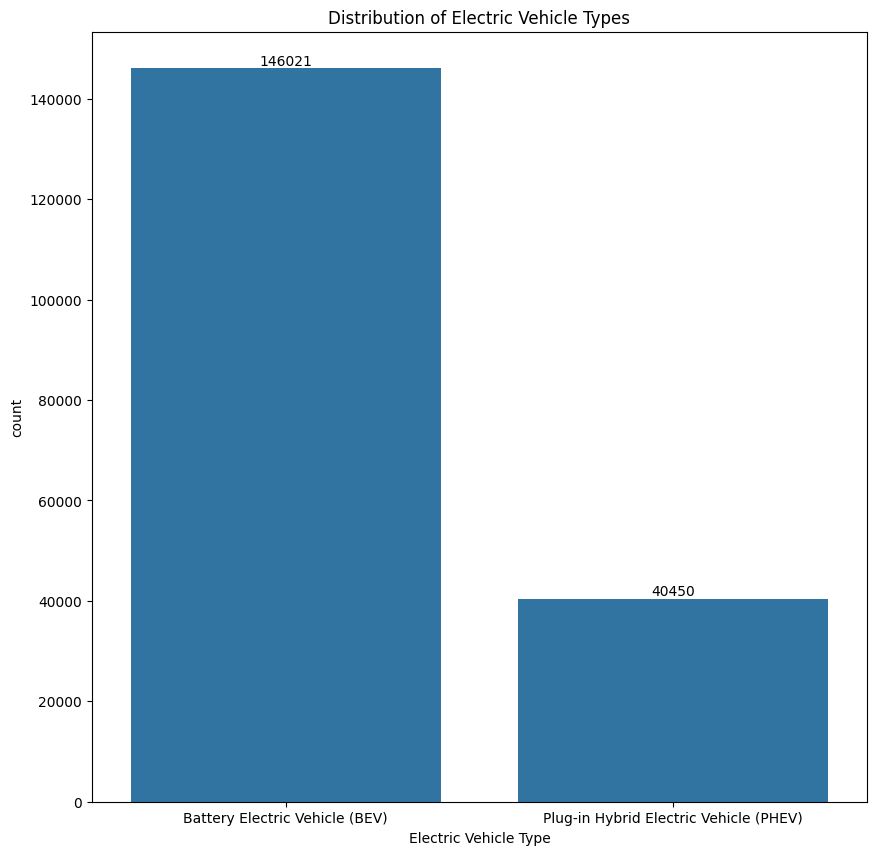

In [229]:
# Distribution of Electric Vehicle Types using countplot
plt.figure(figsize=(10,10))
plot = sns.countplot(data=electric_v, x='Electric Vehicle Type')

# adding labels to each bar which represent the corresponding values
plot.bar_label(plot.containers[0])
plt.title('Distribution of Electric Vehicle Types')
plt.show()

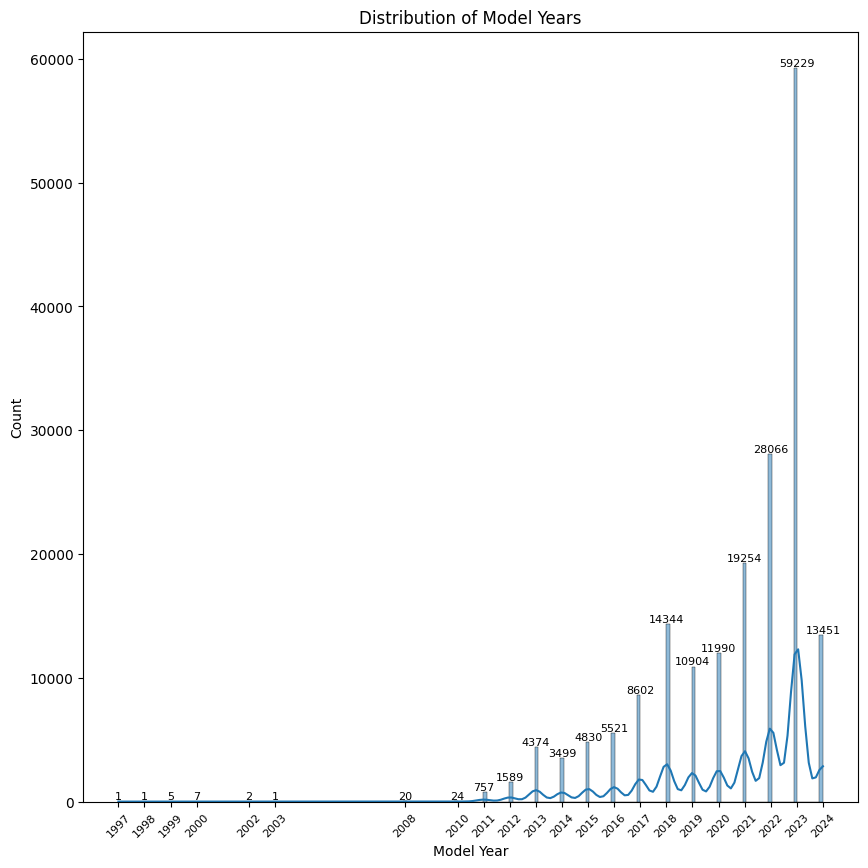

In [230]:
# Distribution of Model Years using histogram
plt.figure(figsize=(10,10))
sns.histplot(data=electric_v, x='Model Year', kde=True)
plt.title('Distribution of Model Years')

# Calculating the count with respect to each model year
year_count = electric_v['Model Year'].value_counts().sort_index()

# adding annotations (label) to each bar
for year, count in year_count.items():
    plt.text(year, count, str(count), ha='center', va='bottom', fontsize=8)

# customizing tick labels in the x-axis
plt.xticks(ticks=year_count.index, rotation=45, fontsize=8)

plt.show()

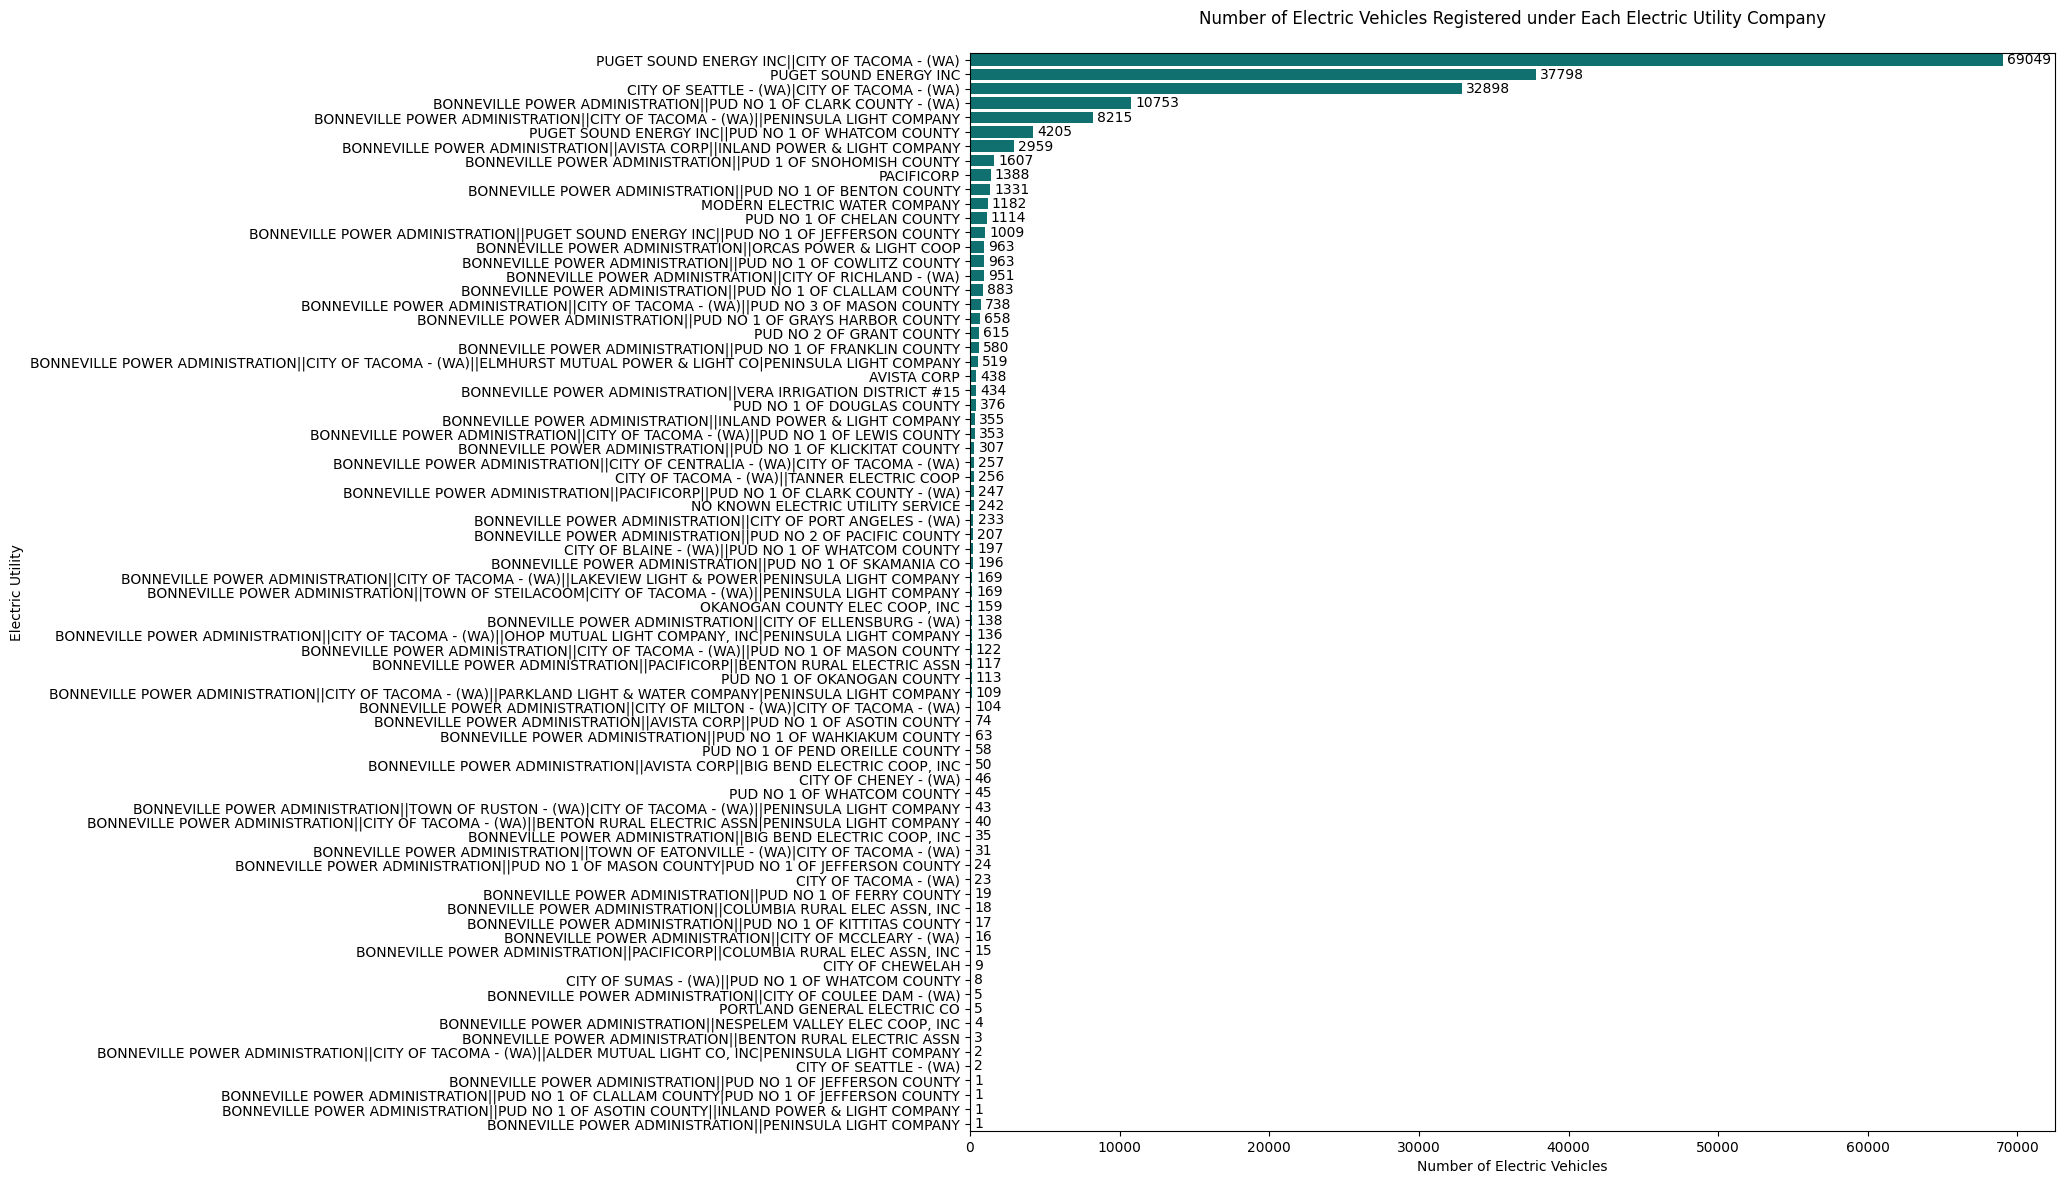

In [237]:
# Calculate the count of electric vehicles for each utility company
utility_counts = electric_v['Electric Utility'].value_counts().sort_values(ascending=False)

# Create a horizontal bar plot visualizing the utility company-wise vehicle count
plt.figure(figsize=(14, 14))
utility_barplot = sns.barplot(y=utility_counts.index, x=utility_counts.values, legend = False, color="teal", order=utility_counts.index)

# Adding annotations (labels) to each bar as integers. Labels are placed at the edge of the bar
for utility_container in utility_barplot.containers:
    utility_barplot.bar_label(utility_container, fmt='%d', label_type='edge', padding=3, color='black', fontsize=10)

# Setting the plot title and x, y axis labels
plt.title('Number of Electric Vehicles Registered under Each Electric Utility Company\n')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('Electric Utility')
plt.show()


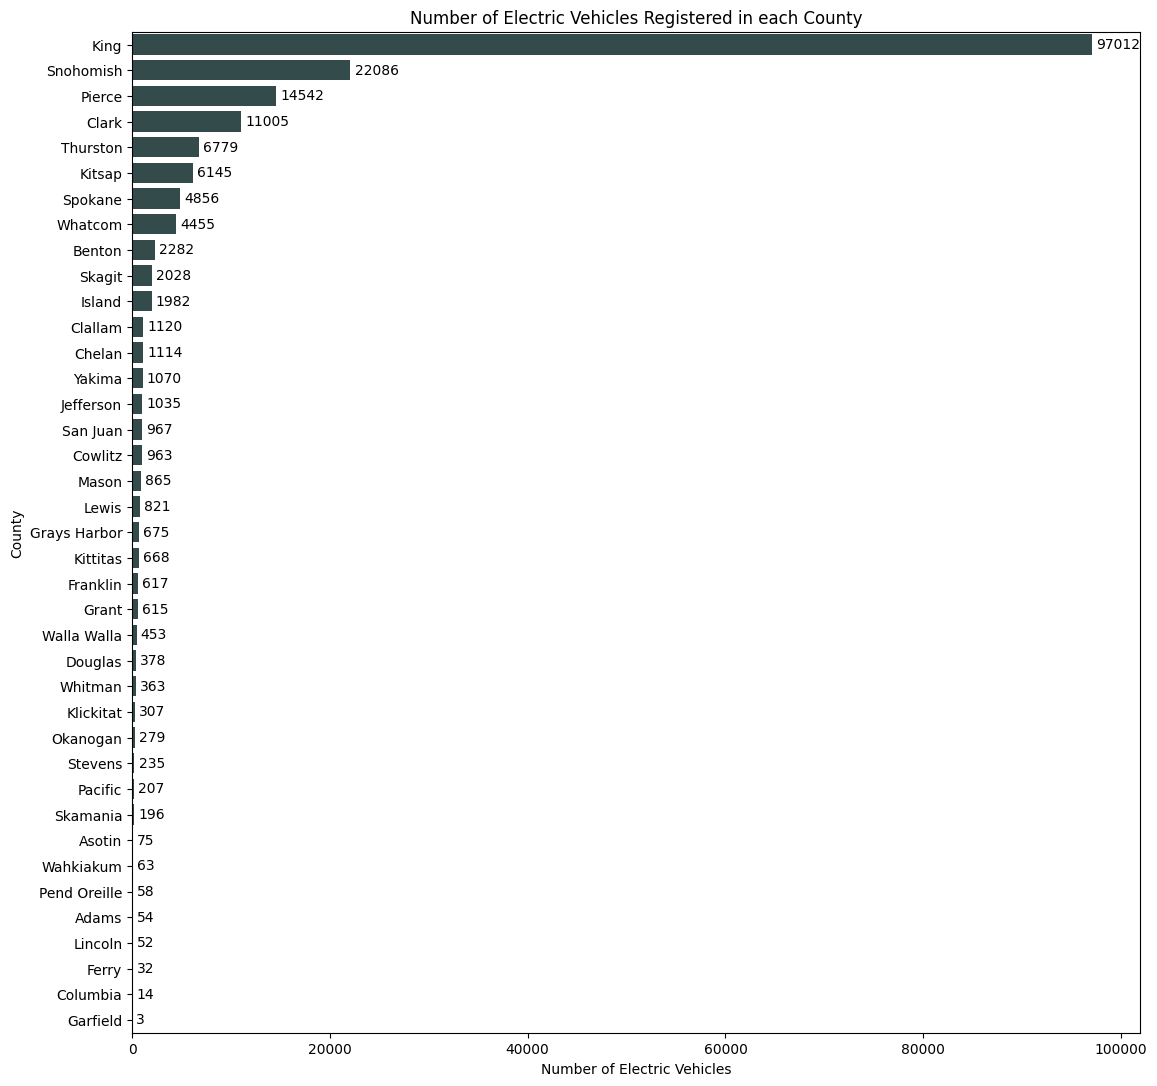

In [232]:

# Calculate the count of electric vehicles in each county
county_counts = electric_v['County'].value_counts().sort_values(ascending=False)
#county_counts.columns = ['County', 'Count']

# Create a horizontal bar plot visualizing the county-wise vehicle count
plt.figure(figsize=(13, 13))
county_barplot = sns.barplot(y=county_counts.index, x= county_counts.values, legend=False, color="darkslategrey", order=county_counts.index)

# Adding annotations (labels) to each bar as integers
for county_container in county_barplot.containers:
    county_barplot.bar_label(county_container, fmt='%d', label_type='edge', padding=3, color='black', fontsize=10)
    

# setting the plot title
# setting the x and y axis labels
plt.title('Number of Electric Vehicles Registered in each County')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('County')
plt.show()

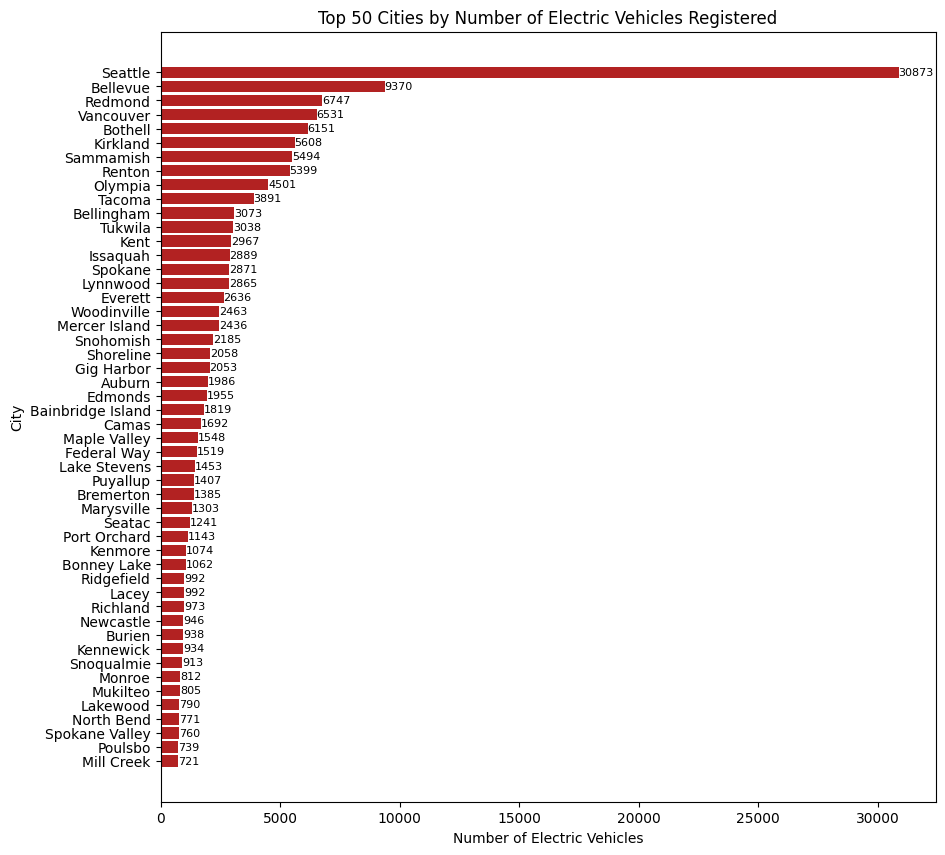

In [233]:
# Calculate the count of electric vehicles in each city
city_counts = electric_v['City'].value_counts().sort_values(ascending=False)

# Get the top 50 cities and sort it in descending order
top_city_counts = city_counts.head(50).sort_values()

# Plotting the top 50 cities using matplotlib
plt.figure(figsize=(10, 10))
plt.barh(top_city_counts.index, top_city_counts.values, color='firebrick')

# Adding annotations (labels) to each bar
for index, value in enumerate(top_city_counts.values):
    plt.text(value, index, f'{value}', va='center', ha='left', color='black', fontsize=8)

# Setting the plot title and x, y axis labels
plt.title('Top 50 Cities by Number of Electric Vehicles Registered')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('City')

# Display the plot
plt.show()

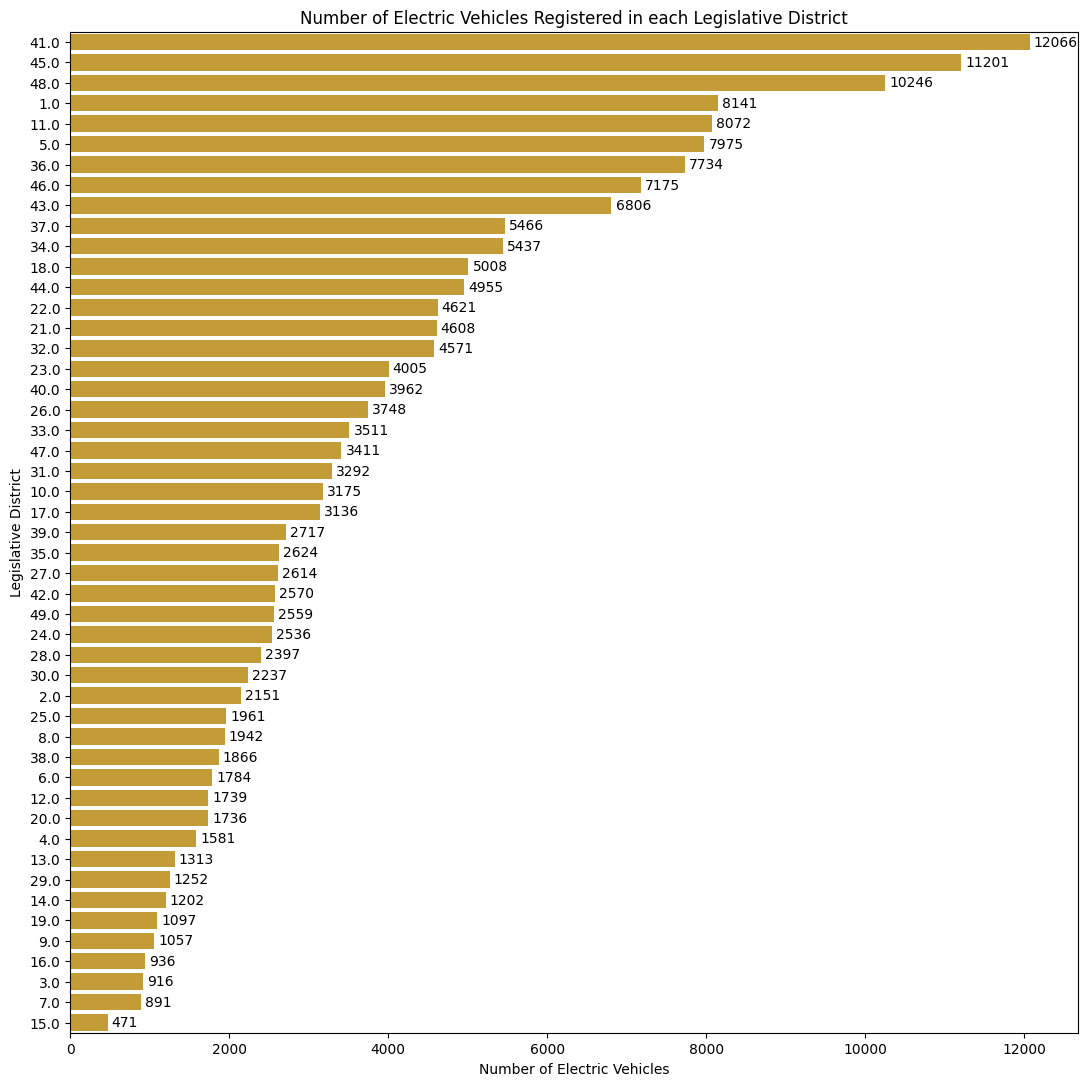

In [234]:
# Calculate the count of electric vehicles for each Legislative District
leg_dist_counts = electric_v['Legislative District'].value_counts()


# Create a horizontal bar plot for legislative district wise vehicle count
plt.figure(figsize=(13, 13))
leg_dist_barplot = sns.barplot(y=leg_dist_counts.index, x= leg_dist_counts.values, legend=False, color="goldenrod", order=leg_dist_counts.index)

# Adding annotations (labels) to each bar as integers
for leg_dist_container in leg_dist_barplot.containers:
    leg_dist_barplot.bar_label(leg_dist_container, fmt='%d', color = 'black', label_type='edge', padding=3, fontsize=10)
    

plt.title('Number of Electric Vehicles Registered in each Legislative District')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('Legislative District')
plt.show()

Bivariate Analysis

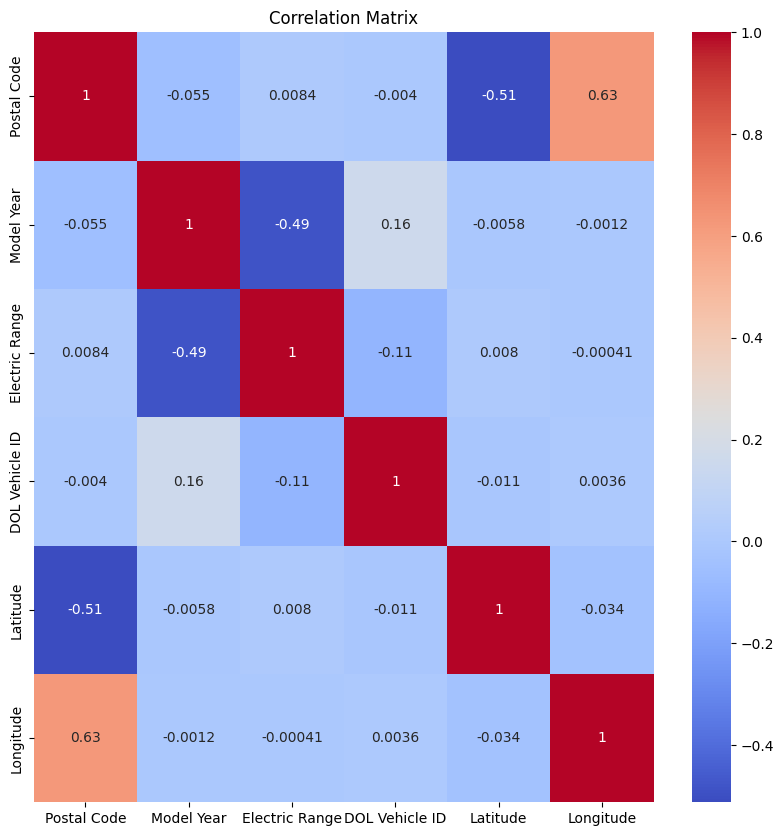

In [235]:
num_electric_v = electric_v.select_dtypes(include=['number'])
corr_matrix = num_electric_v.corr()

plt.figure(figsize=(10,10))

sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

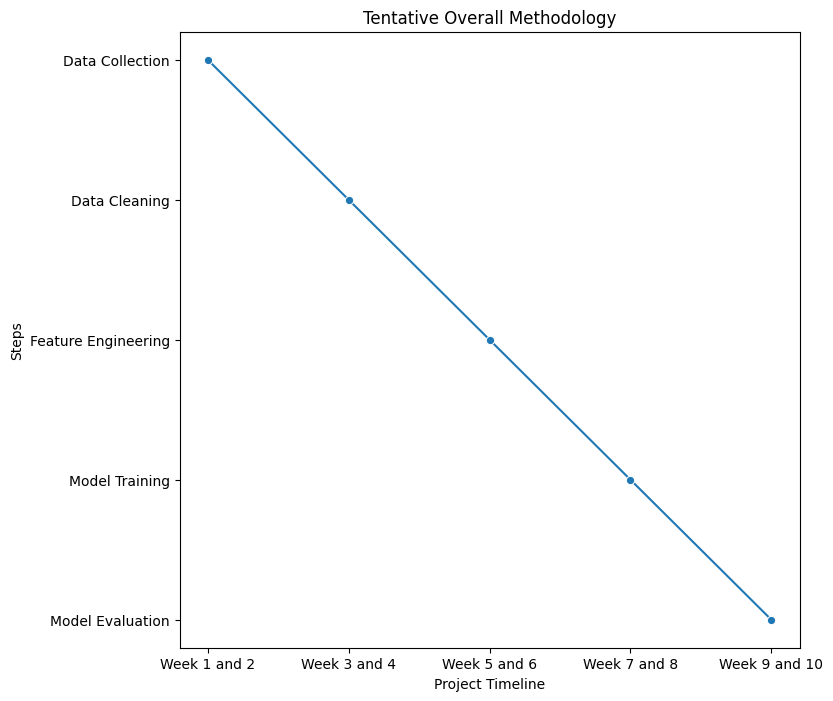

In [236]:
# Sample data for methodology graph
steps = ['Data Collection', 'Data Cleaning', 'Feature Engineering', 'Model Training', 'Model Evaluation']

timeline = ['Week 1 and 2', 'Week 3 and 4', 'Week 5 and 6', 'Week 7 and 8', 'Week 9 and 10']

plt.figure(figsize=(8, 8))
sns.lineplot(x=timeline, y=steps, marker='o')
plt.title('Tentative Overall Methodology')
plt.xlabel('Project Timeline')
plt.ylabel('Steps')
plt.show()
